In [50]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.downloader.download('vader_lexicon')
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
df_news = pd.read_csv("E:/stock/news_filtered.csv")
df_news.head()

,publish_date,headline_category,headline_text
0,2001-02-11 00:00:00,SBI,Federal officials check documents at US SBI br...
1,2001-02-16 00:00:00,NTPC,NTPC not to disrupt power supply to Bihar
2,2001-02-26 00:00:00,NTPC,NTPC may curtail supply to BSEB
3,2001-05-18 00:00:00,HCL,Clause to protect HCL jobs after sell-off
4,2001-05-18 00:00:00,HCL,Clause to protect HCL jobs after sell-off


In [52]:
def getSubjectivity(text):
      return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
      return  TextBlob(text).sentiment.polarity

In [53]:
df_news['Polarity'] = df_news['headline_text'].apply(getPolarity)
df_news['Subjectivity'] = df_news['headline_text'].apply(getSubjectivity)


In [54]:
df_news

,publish_date,headline_category,headline_text,Polarity,Subjectivity
0,2001-02-11 00:00:00,SBI,Federal officials check documents at US SBI br...,0.000000,0.000000
1,2001-02-16 00:00:00,NTPC,NTPC not to disrupt power supply to Bihar,0.000000,0.000000
2,2001-02-26 00:00:00,NTPC,NTPC may curtail supply to BSEB,0.000000,0.000000
3,2001-05-18 00:00:00,HCL,Clause to protect HCL jobs after sell-off,0.000000,0.000000
4,2001-05-18 00:00:00,HCL,Clause to protect HCL jobs after sell-off,0.000000,0.000000
...,...,...,...,...,...
8223,2022-03-29 00:00:00,HCL,HCL wins contract from Novo Nordisk,0.300000,0.200000
8224,2022-03-30 00:00:00,ONGC,Govt offers 18.9 crore ONGC shares for Rs 159 ...,0.100000,0.000000
8225,2022-03-31 00:00:00,SBI,SBI exploring new ways to resolve retail loan ...,0.136364,0.454545
8226,2022-03-31 00:00:00,HDFC,Sebi disposes of show cause notice issued to HDFC,0.000000,0.000000


In [55]:
sia = SentimentIntensityAnalyzer()
df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['headline_text']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['headline_text']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['headline_text']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['headline_text']]
df_news

,publish_date,headline_category,headline_text,Polarity,Subjectivity,Compound,Negative,Neutral,Positive
0,2001-02-11 00:00:00,SBI,Federal officials check documents at US SBI br...,0.000000,0.000000,0.0000,0.000,1.000,0.000
1,2001-02-16 00:00:00,NTPC,NTPC not to disrupt power supply to Bihar,0.000000,0.000000,0.0000,0.000,1.000,0.000
2,2001-02-26 00:00:00,NTPC,NTPC may curtail supply to BSEB,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2001-05-18 00:00:00,HCL,Clause to protect HCL jobs after sell-off,0.000000,0.000000,0.3818,0.000,0.698,0.302
4,2001-05-18 00:00:00,HCL,Clause to protect HCL jobs after sell-off,0.000000,0.000000,0.3818,0.000,0.698,0.302
...,...,...,...,...,...,...,...,...,...
8223,2022-03-29 00:00:00,HCL,HCL wins contract from Novo Nordisk,0.300000,0.200000,0.5719,0.000,0.575,0.425
8224,2022-03-30 00:00:00,ONGC,Govt offers 18.9 crore ONGC shares for Rs 159 ...,0.100000,0.000000,0.2960,0.000,0.804,0.196
8225,2022-03-31 00:00:00,SBI,SBI exploring new ways to resolve retail loan ...,0.136364,0.454545,-0.0516,0.226,0.565,0.210
8226,2022-03-31 00:00:00,HDFC,Sebi disposes of show cause notice issued to HDFC,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [56]:
 df_news['sentiment'] = 0

In [57]:
def compare_logic(val1, val2, val3):
  i = 0
  if(val1<val2):
    i = 2
  if(val2<val3):
    i=1
  return i

df_news['sentiment'] = df_news.apply(lambda row: compare_logic(row['Negative'], row['Neutral'], row['Positive']), axis=1)

In [58]:
list_corpus = df_news['headline_text'].tolist()
list_labels = df_news['sentiment'].tolist()
X_train,X_test,y_train,y_test = train_test_split(list_corpus,list_labels,
                                                test_size=0.3,random_state=0)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

X_train_tfidf,tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [61]:
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

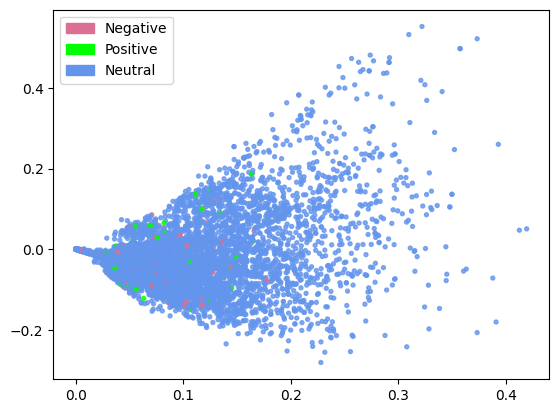

<Figure size 1600x1600 with 0 Axes>

In [62]:
def plot_LSA(test_data,test_labels,savepath = 'PCA_demo.csv',plot = True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['#DB7093','#00FF00','#6495ED']
    if plot:
        plt.scatter(lsa_scores[:,0],lsa_scores[:,1],s = 8,alpha= .8,c = test_labels,
                    cmap=matplotlib.colors.ListedColormap(colors))
        pink_patch = mpatches.Patch(color = '#DB7093',label = 'Negative')
        green_patch = mpatches.Patch(color = '#00FF00',label = 'Positive')
        blue_patch = mpatches.Patch(color = '#6495ED',label = 'Neutral')
        plt.legend(handles = [pink_patch,green_patch,blue_patch],prop = {'size':10})
        fig = plt.figure(figsize=(16,16))
plot_LSA(X_train_tfidf,y_train)
plt.show()

In [63]:
year = df_news['publish_date'].str.split('-')
df_news['publish_year'] = year.str.get(0)
df_news['publish_year'] = df_news['publish_year'].astype(int)

In [64]:
df = pd.read_csv("E:/stock/StocksCombined-2002-2023.csv")
year = df['Date'].str.split('-')
df['year'] = year.str.get(2)
df['headline_category'] = [x.split('_')[0] for x in df['Stock_ID']]
df['year'] = df['year'].astype(int)

In [88]:
df_news

,publish_date,headline_category,headline_text,Polarity,Subjectivity,Compound,Negative,Neutral,Positive,sentiment,publish_year
0,2001-02-11 00:00:00,SBI,Federal officials check documents at US SBI br...,0.000000,0.000000,0.0000,0.000,1.000,0.000,2,2001
1,2001-02-16 00:00:00,NTPC,NTPC not to disrupt power supply to Bihar,0.000000,0.000000,0.0000,0.000,1.000,0.000,2,2001
2,2001-02-26 00:00:00,NTPC,NTPC may curtail supply to BSEB,0.000000,0.000000,0.0000,0.000,1.000,0.000,2,2001
3,2001-05-18 00:00:00,HCL,Clause to protect HCL jobs after sell-off,0.000000,0.000000,0.3818,0.000,0.698,0.302,2,2001
4,2001-05-18 00:00:00,HCL,Clause to protect HCL jobs after sell-off,0.000000,0.000000,0.3818,0.000,0.698,0.302,2,2001
...,...,...,...,...,...,...,...,...,...,...,...
8223,2022-03-29 00:00:00,HCL,HCL wins contract from Novo Nordisk,0.300000,0.200000,0.5719,0.000,0.575,0.425,2,2022
8224,2022-03-30 00:00:00,ONGC,Govt offers 18.9 crore ONGC shares for Rs 159 ...,0.100000,0.000000,0.2960,0.000,0.804,0.196,2,2022
8225,2022-03-31 00:00:00,SBI,SBI exploring new ways to resolve retail loan ...,0.136364,0.454545,-0.0516,0.226,0.565,0.210,2,2022
8226,2022-03-31 00:00:00,HDFC,Sebi disposes of show cause notice issued to HDFC,0.000000,0.000000,0.0000,0.000,1.000,0.000,2,2022


In [65]:
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)


check_missing(df)

,Total,Percent
Open,369,0.00157
High,369,0.00157
Low,369,0.00157
Close,369,0.00157
Adj Close,369,0.00157
Volume,369,0.00157
Stock_ID,0,0.00000
Date,0,0.00000
VWAP,0,0.00000
year,0,0.00000


In [66]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,year
count,234628.000000,234628.000000,234628.000000,234628.000000,234628.000000,2.346280e+05,234997.000000
mean,775.444997,785.112550,764.988056,774.818269,720.474456,7.400931e+06,2012.228411
std,1652.366094,1669.672776,1633.270917,1651.136437,1594.808929,1.737073e+07,6.446657
min,0.858340,0.928846,0.858340,0.919650,-0.011040,0.000000e+00,2000.000000
25%,93.515732,95.328964,91.555418,93.375126,74.018511,5.926360e+05,2007.000000
50%,252.500000,256.632095,248.439774,252.194999,214.542923,2.349409e+06,2012.000000
75%,695.450012,705.250000,685.000000,695.021881,648.221603,7.108554e+06,2018.000000
max,23025.000000,23175.250000,22877.300780,22968.550780,22968.550780,6.428460e+08,2023.000000


In [67]:
value_counts = df_news['headline_category'].value_counts()
print(value_counts)

SBI          2297
ONGC         1516
NTPC          890
ICICI         877
HDFC          839
ITC           777
HCL           749
SUN           194
TECH           52
UPL            12
BAJAJ          10
AXIS            5
INFOSYS         2
WIPRO           2
TITAN           2
ADANI           2
BRITANNIA       1
BHARTI          1
Name: headline_category, dtype: int64


In [68]:
counts = df['Stock_ID'].value_counts()
print(counts)

WIPRO                        5873
HINDUSTAN UNILEVER           5873
INFOSYS                      5873
HDFC_BANK                    5873
ITC                          5873
EICHER MOTOTRS               5873
ONGC                         5873
RELIANCE                     5873
CIPLA                        5873
BRITANNIA                    5873
SBI_BANK                     5873
BHARAT PETROLEUM             5873
SUN_PHARMA                   5873
TATA CONSUMER PRODUCTS       5873
TATA MOTORS                  5873
AXIS_BANK                    5873
TATA STEEL                   5873
TITAN                        5873
HINDALCO                     5873
KOTAK_MAHINDRA               5482
ICICI_BANK                   5222
ADANI_ENTERPRISES            5222
HERO MOTOCORP                5222
BAJAJ_FINANCE                5222
APOLLO HOSPITALS             5222
ASIAN PAINTS                 5222
BAJAJ AUTO                   5222
BHARTI_AIRTEL                5222
GRASIM                       5222
TATA CONSULTAN

In [69]:
df

,Stock_ID,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,year,headline_category
0,ADANI_ENTERPRISES,02-07-2002,1.386372,1.390971,1.356484,1.373344,-0.010540,1016147.0,1.373599667,2002,ADANI
1,ADANI_ENTERPRISES,03-07-2002,1.371811,1.387139,1.364914,1.373344,-0.010540,980394.0,1.375132333,2002,ADANI
2,ADANI_ENTERPRISES,04-07-2002,1.379475,1.401700,1.379475,1.381008,-0.010599,972747.0,1.387394333,2002,ADANI
3,ADANI_ENTERPRISES,05-07-2002,1.388672,1.388672,1.372578,1.377942,-0.010575,974496.0,1.379730667,2002,ADANI
4,ADANI_ENTERPRISES,08-07-2002,1.394803,1.454580,1.364914,1.438486,-0.011040,1061686.0,1.419326667,2002,ADANI
...,...,...,...,...,...,...,...,...,...,...,...
234992,WIPRO,19-06-2023,382.000000,382.000000,377.100006,380.149994,380.149994,5314720.0,379.75,2023,WIPRO
234993,WIPRO,20-06-2023,381.799988,384.950012,380.600006,382.500000,382.500000,5901329.0,382.6833393,2023,WIPRO
234994,WIPRO,21-06-2023,384.250000,387.250000,383.100006,385.500000,385.500000,4414632.0,385.2833353,2023,WIPRO
234995,WIPRO,22-06-2023,386.000000,386.000000,381.600006,382.299988,382.299988,4678087.0,383.299998,2023,WIPRO


In [70]:
df.to_csv('E:/stock/final.csv', index=False)
df_price = pd.DataFrame()

In [78]:
with open('E:/stock/price.csv', 'w') as f:
  pass


In [79]:
batch_size = 6000
file_path="E:/stock/final.csv"
file= 'E:/stock/price.csv'
stat = os.stat('E:/stock/price.csv')

for chunk_dataframe in pd.read_csv(file_path,chunksize=batch_size):
  df_merge = pd.merge(chunk_dataframe,df_news,how='outer',on='headline_category')
  df_duplicates = df_merge.drop_duplicates()
  header = df_duplicates.columns.tolist()
  if (stat.st_size==0):  
    df_duplicates.to_csv(file, mode='a', index=False, header=header)
  else:
  
    df_duplicates.to_csv(file,mode='a', index=False, header=False)  

  

  

In [80]:
with open('E:/stock/result.csv', 'w') as f:
  pass

In [89]:
print(df_duplicates.columns)

Index(['Stock_ID', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'VWAP', 'year', 'headline_category', 'publish_date',
       'headline_text', 'Polarity', 'Subjectivity', 'Compound', 'Negative',
       'Neutral', 'Positive', 'sentiment', 'publish_year'],
      dtype='object')


In [87]:
print(chunk_dataframe.columns)

Index(['Stock_ID', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'VWAP', 'year', 'headline_category'],
      dtype='object')


In [90]:
batch_size = 6000
file_path="E:/stock/price.csv"
file= 'E:/stock/result.csv'
stat = os.stat('E:/stock/result.csv')

for chunk_dataframe in pd.read_csv(file_path,chunksize=batch_size):
  
  df_duplicate= chunk_dataframe[chunk_dataframe['year']==chunk_dataframe['publish_year']]
  header = df_duplicate.columns.tolist()
  if (stat.st_size==0):  
    df_duplicate.to_csv(file, mode='a', index=False, header=header)
  else:
    df_duplicate.to_csv(file,mode='a', index=False, header=False)  